c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8288 - loss: 0.4053 - val_accuracy: 0.9534 - val_loss: 0.4970
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9340 - loss: 0.1909 - val_accuracy: 0.9185 - val_loss: 0.4124
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9528 - loss: 0.1586 - val_accuracy: 0.9428 - val_loss: 0.2637
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9576 - loss: 0.1370 - val_accuracy: 0.9671 - val_loss: 0.1577
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9496 - loss: 0.1719 - val_accuracy: 0.9619 - val_loss: 0.1099
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9443 - loss: 0.1522 - val_accuracy: 0.9811 - val_loss: 0.0718
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9596 - loss: 0.1554 - val_accuracy: 0.9822 - val_loss: 0.0636
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9513 - loss: 0.1502 - val_accu

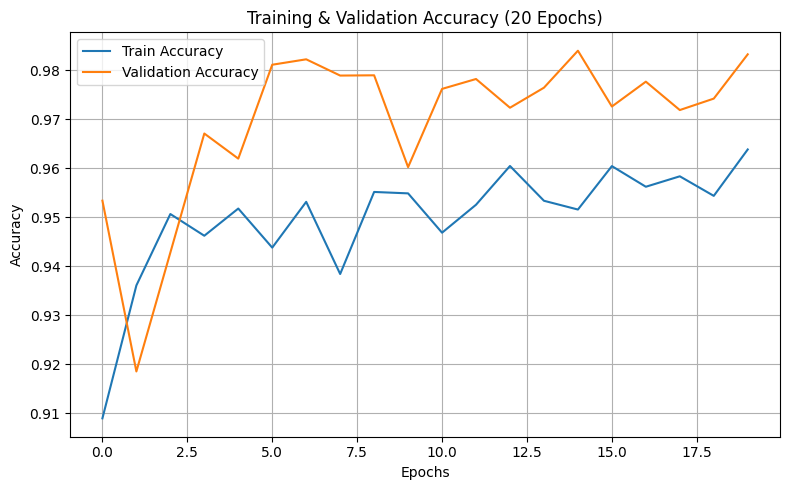

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8330 - loss: 0.4100 - val_accuracy: 0.9816 - val_loss: 0.2243
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9482 - loss: 0.2048 - val_accuracy: 0.8521 - val_loss: 0.4129
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9165 - loss: 0.2044 - val_accuracy: 0.9459 - val_loss: 0.1736
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9460 - loss: 0.1763 - val_accuracy: 0.9620 - val_loss: 0.1182
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9591 - loss: 0.1210 - val_accuracy: 0.9704 - val_loss: 0.0814
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9413 - loss: 0.1548 - val_accuracy: 0.9440 - val_loss: 0.1332
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9347 - loss: 0.1504 - val_accuracy: 0.9605 - val_loss: 0.0996
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9460 - loss: 0.1310 - val_accu

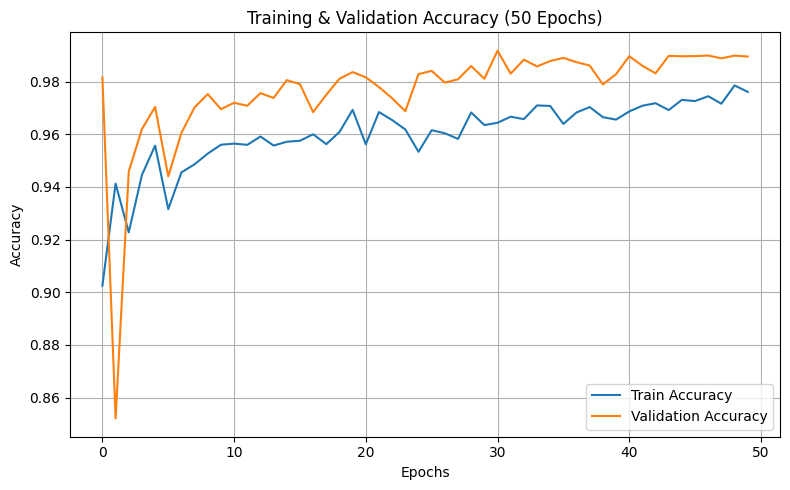

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1).values
y = df['Class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Function to build CNN model
def build_model():
    model = Sequential([
        Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),
        Dropout(0.2),

        Conv1D(64, kernel_size=2, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(25, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model for 20 epochs
model_20 = build_model()
history_20 = model_20.fit(
    X_train, y_train,
    epochs=20,
    batch_size=2048,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    verbose=1
)

# Plot for 20 Epochs
plt.figure(figsize=(8, 5))
plt.plot(history_20.history['accuracy'], label='Train Accuracy')
plt.plot(history_20.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training & Validation Accuracy (20 Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Train model for 50 epochs
model_50 = build_model()
history_50 = model_50.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2048,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    verbose=1
)

# Plot for 50 Epochs
plt.figure(figsize=(8, 5))
plt.plot(history_50.history['accuracy'], label='Train Accuracy')
plt.plot(history_50.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training & Validation Accuracy (50 Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
